In [1]:
import warnings
warnings.simplefilter(action='ignore',)

import numpy as np
import matplotlib.pyplot as plt

from qiskit import BasicAer, QuantumCircuit,execute
from qiskit.quantum_info import Operator
backend = BasicAer.get_backend("qasm_simulator")

from qiskit.visualization import plot_histogram

 ### Ex. 2 qubits
 #### Oracle
 $|w\rangle=|11\rangle$
 
 #### CZ gate: 
 $|00\rangle \rightarrow|00\rangle,\
  |01\rangle \rightarrow|01\rangle,\
  |10\rangle \rightarrow|10\rangle,\
  |11\rangle \rightarrow-|11\rangle$
  
 #### Z$\otimes$Z: 
 $|00\rangle \rightarrow|00\rangle,\
  |01\rangle \rightarrow-|01\rangle,\
  |10\rangle \rightarrow-|10\rangle,\
  |11\rangle \rightarrow|11\rangle$
  
 #### CZ gate: 
 $|00\rangle \rightarrow|00\rangle,\
  -|01\rangle \rightarrow-|01\rangle,\
  -|10\rangle \rightarrow-|10\rangle,\
  |11\rangle \rightarrow-|11\rangle$

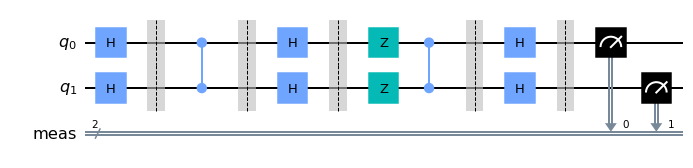

In [2]:
qc = QuantumCircuit(2)
qc.h([0,1])
qc.barrier()

# |𝑤> = |11> (w = 3)
qc.cz(0,1)
qc.barrier()

qc.h([0,1])
qc.barrier()
qc.z([0,1])
qc.cz(0,1)
qc.barrier()
qc.h([0,1])

qc.measure_all()
qc.draw(output="mpl")

In [3]:
result = execute(qc, backend=backend,shots=1024).result()
result.get_counts()

{'11': 1024}

#### Generate gates by matrix

In [4]:
def oracle_func(n_qubit,w_list):
    qc = QuantumCircuit(n_qubit)

    oracle_matrix = np.identity(2**n_qubit)    
    for i in w_list: oracle_matrix[i,i] = -1
        
    # Ex. |𝑤> = |11> (w = 3), 2 qubits
    
    # array([[ 1.,  0.,  0.,  0.],
    #        [ 0.,  1.,  0.,  0.],
    #        [ 0.,  0.,  1.,  0.],
    #        [ 0.,  0.,  0., -1.]]) 
    
    # This is equivalent to applying a CZ gate    
    qc.unitary(Operator(oracle_matrix), range(n_qubit))
    
    oracle_gate = qc.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate

In [5]:
def reflection_func(n_qubit):
    qc = QuantumCircuit(n_qubit)
    
    reflection_matrix = np.identity(2**n_qubit)  
    for i in range(2**n_qubit-1): reflection_matrix[i+1,i+1] = -1
        
    # Ex. 2 qubits
    
    # array([[ 1.,  0.,  0.,  0.],
    #        [ 0., -1.,  0.,  0.],
    #        [ 0.,  0., -1.,  0.],
    #        [ 0.,  0.,  0., -1.]])
    
    # This is equivalent to applying 2 Z gates and a CZ gate   
    qc.unitary(Operator(reflection_matrix), range(n_qubit))
  
    reflection_gate = qc.to_gate()
    reflection_gate.name = "Reflection"
    return reflection_gate    

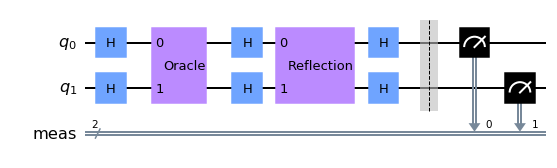

In [6]:
QUBIT = 2
OBJECT = [3]

qc = QuantumCircuit(QUBIT)
reflection = reflection_func(QUBIT)
qc.h(range(QUBIT))

oracle = oracle_func(QUBIT,OBJECT)
qc.append(oracle, range(QUBIT))

qc.h(range(QUBIT))
qc.append(reflection, range(QUBIT))
qc.h(range(QUBIT))

qc.measure_all()
qc.draw(output="mpl")

In [7]:
result = execute(qc, backend=backend,shots=1024).result()
result.get_counts()

{'11': 1024}

### Ex. 3 qubits

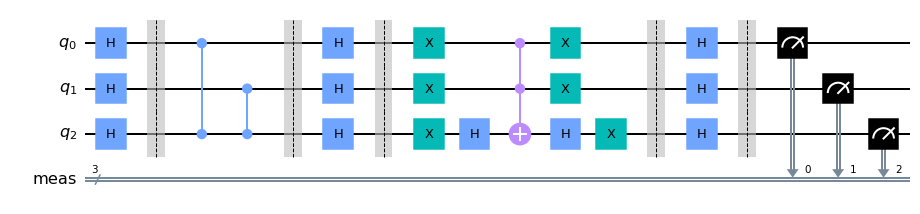

In [8]:
qc = QuantumCircuit(3)
qc.h([0,1,2])
qc.barrier()

# |𝑤_1>,|𝑤_2> = |101>,|110> (w_1,w_2= 5,7)
qc.cz(0, 2)
qc.cz(1, 2)
qc.barrier()

qc.h([0,1,2])
qc.barrier()
qc.x([0,1,2])
qc.h(2)
qc.mct([0,1],2)
qc.h(2)
qc.x([0,1,2])
qc.barrier()
qc.h([0,1,2])

qc.measure_all()
qc.draw(output="mpl")

In [9]:
result = execute(qc, backend=backend,shots=1024).result()
result.get_counts()

{'101': 514, '110': 510}

#### Generate gates by matrix

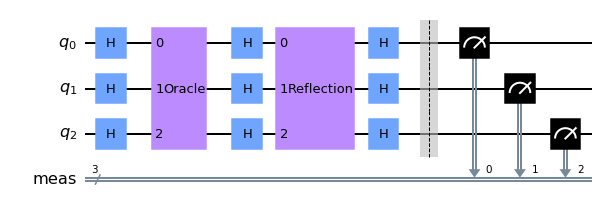

In [10]:
QUBIT = 3
OBJECT = [5,6]

qc = QuantumCircuit(QUBIT)
reflection = reflection_func(QUBIT)
qc.h(range(QUBIT))

oracle = oracle_func(QUBIT,OBJECT)
qc.append(oracle, range(QUBIT))

qc.h(range(QUBIT))
qc.append(reflection, range(QUBIT))
qc.h(range(QUBIT))

qc.measure_all()
qc.draw(output="mpl")

In [11]:
result = execute(qc, backend=backend,shots=1024).result()
result.get_counts()

{'101': 540, '110': 484}

### Grover's algorithm

r = 1.6734079041462837


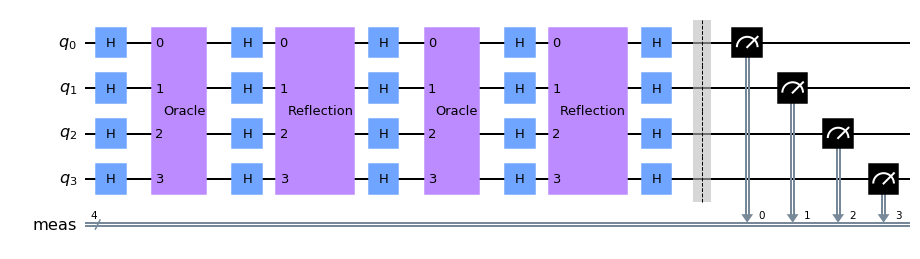

In [12]:
QUBIT = 4
OBJECT = [3,13]
REPEAT = np.pi/(4*np.arcsin(np.sqrt(len(OBJECT)/2**QUBIT)))-1/2
print("r =",REPEAT)

qc = QuantumCircuit(QUBIT)
oracle = oracle_func(QUBIT,OBJECT)
reflection = reflection_func(QUBIT)
qc.h(range(QUBIT))

for i in range(int(np.round(REPEAT))):
    qc.append(oracle, range(QUBIT))
    qc.h(range(QUBIT))
    qc.append(reflection, range(QUBIT))
    qc.h(range(QUBIT))
qc.measure_all()
qc.draw(output="mpl")

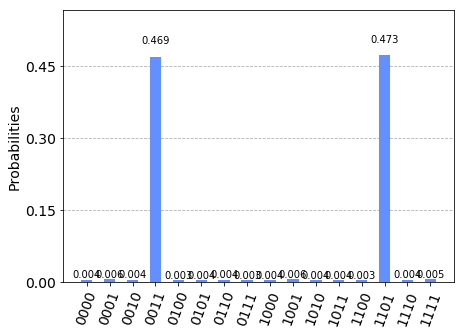

In [13]:
result = execute(qc, backend=backend,shots=4096).result()
plot_histogram(result.get_counts())